# Лабораторна робота №6. Завдання 1. Варіант 9
## Побудова logit-моделі з дискретними залежними змінними

---

## 1. Імпорт бібліотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Налаштування для кращого відображення
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

print("✅ Бібліотеки успішно імпортовано")

✅ Бібліотеки успішно імпортовано


## 2. Завантаження та підготовка даних

In [2]:
# Завантаження даних
df = pd.read_csv('firms_data.csv')

print("Вихідні дані (всі підприємства):")
display(df)

Вихідні дані (всі підприємства):


,firm_id,X1,X2,X3,X4,X5
0,1,9.26,0.78,1.37,0.23,1.45
1,2,9.38,0.75,1.49,0.39,1.30
2,3,12.11,0.68,1.44,0.43,1.37
3,4,10.81,0.70,1.42,0.18,1.65
4,5,9.35,0.62,1.35,0.15,1.91
5,6,9.87,0.76,1.39,0.34,1.68
6,8,9.12,0.71,1.27,0.09,1.89
7,12,5.49,0.74,1.10,0.05,1.02
8,14,6.61,0.72,1.23,0.48,0.88
9,15,4.32,0.68,1.39,0.41,0.62


# Визначення груп за варіантом 9
# Група A (0): підприємства № 1, 3, 4, 5, 6, 8, 24, 29
# Група B (1): підприємства № 14, 15, 16, 21, 23, 27, 28, 41
group_A = [1, 3, 4, 5, 6, 8, 24, 29]
group_B = [14, 15, 16, 21, 23, 27, 28, 41]

# Додавання бінарної змінної group
df['group'] = df['firm_id'].apply(lambda x: 1 if x in group_B else (0 if x in group_A else np.nan))

# Розділення на навчальну вибірку та підприємства для прогнозу
train_df = df[df['group'].notna()].copy()
predict_df = df[df['group'].isna()].copy()

print(f"\n📊 Навчальна вибірка: {len(train_df)} підприємств")
print(f"  - Група A (0): {len(train_df[train_df['group']==0])} підприємств")
print(f"  - Група B (1): {len(train_df[train_df['group']==1])} підприємств")
print(f"\n🔮 Підприємства для прогнозу: {len(predict_df)} підприємств (№{list(predict_df['firm_id'])})")

In [4]:
# Навчальна вибірка
print("\nНавчальна вибірка:")
display(train_df[['firm_id', 'X1', 'X2', 'X3', 'X4', 'X5', 'group']])


Навчальна вибірка:


,firm_id,X1,X2,X3,X4,X5,group
0,1,9.26,0.78,1.37,0.23,1.45,0.0
2,3,12.11,0.68,1.44,0.43,1.37,0.0
3,4,10.81,0.70,1.42,0.18,1.65,0.0
4,5,9.35,0.62,1.35,0.15,1.91,0.0
5,6,9.87,0.76,1.39,0.34,1.68,0.0
6,8,9.12,0.71,1.27,0.09,1.89,0.0
8,14,6.61,0.72,1.23,0.48,0.88,1.0
9,15,4.32,0.68,1.39,0.41,0.62,1.0
10,16,7.37,0.77,1.38,0.62,1.09,1.0
11,21,6.64,0.77,1.35,0.50,1.32,1.0


In [5]:
# Описова статистика
print("\nОписова статистика факторних ознак (навчальна вибірка):")
display(train_df[['X1', 'X2', 'X3', 'X4', 'X5']].describe())


Описова статистика факторних ознак (навчальна вибірка):


,X1,X2,X3,X4,X5
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,7.998125,0.734375,1.308125,0.434375,1.496875
std,2.274189,0.049661,0.158123,0.277151,0.547439
min,4.320000,0.620000,0.790000,0.090000,0.620000
25%,6.377500,0.707500,1.262500,0.225000,1.202500
50%,8.245000,0.740000,1.350000,0.400000,1.440000
75%,9.495000,0.772500,1.390000,0.530000,1.837500
max,12.110000,0.790000,1.480000,1.200000,2.620000


## 3. Побудова logit-моделі

In [6]:
# Підготовка змінних
y_train = train_df['group']
X_train = train_df[['X1', 'X2', 'X3', 'X4', 'X5']]
X_train_const = sm.add_constant(X_train)

# Побудова logit-моделі
logit_model = Logit(y_train, X_train_const)
logit_result = logit_model.fit(method='bfgs', maxiter=100)

# Виведення повного звіту
print("\n" + "="*80)
print("ПОВНИЙ ЗВІТ LOGIT-МОДЕЛІ")
print("="*80)
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27

ПОВНИЙ ЗВІТ LOGIT-МОДЕЛІ
                           Logit Regression Results                           
Dep. Variable:                  group   No. Observations:                   16
Model:                          Logit   Df Residuals:                       10
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Dec 2025   Pseudo R-squ.:                   1.000
Time:                        15:07:36   Log-Likelihood:            -1.9522e-05
converged:                       True   LL-Null:                       -11.090
Covariance Type:            nonrobust   LLR p-value:                 0.0004838
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [7]:
# Виведення рівняння моделі
print("\n" + "="*80)
print("РІВНЯННЯ LOGIT-МОДЕЛІ")
print("="*80)
print("\nЗагальний вигляд:")
print("P(Y=1|X) = exp(u) / (1 + exp(u))")
print("де u = β₀ + β₁·X₁ + β₂·X₂ + β₃·X₃ + β₄·X₄ + β₅·X₅")

print("\nОцінені коефіцієнти:")
params = logit_result.params
for param, value in params.items():
    print(f"  {param}: {value:.6f}")

# Формування рівняння з числами
equation = f"u = {params['const']:.4f}"
for var in ['X1', 'X2', 'X3', 'X4', 'X5']:
    sign = '+' if params[var] >= 0 else ''
    equation += f" {sign} {params[var]:.4f}·{var}"
print(f"\nКонкретне рівняння:\n{equation}")


РІВНЯННЯ LOGIT-МОДЕЛІ

Загальний вигляд:
P(Y=1|X) = exp(u) / (1 + exp(u))
де u = β₀ + β₁·X₁ + β₂·X₂ + β₃·X₃ + β₄·X₄ + β₅·X₅

Оцінені коефіцієнти:
  const: 48.050875
  X1: -18.672259
  X2: 37.589825
  X3: 52.003328
  X4: 58.658580
  X5: -4.642726

Конкретне рівняння:
u = 48.0509  -18.6723·X1 + 37.5898·X2 + 52.0033·X3 + 58.6586·X4  -4.6427·X5


## 4. Оцінка якості класифікації (Завдання п.1)

In [8]:
# Прогнозовані ймовірності
y_pred_proba = logit_result.predict(X_train_const)
train_df['predicted_prob'] = y_pred_proba

# Класифікація при порозі 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)
train_df['predicted_group'] = y_pred

# Таблиця спостережуваних, прогнозованих та залишків
print("\n" + "="*80)
print("ТАБЛИЦЯ: СПОСТЕРЕЖУВАНІ ТА ПРОГНОЗОВАНІ ЗНАЧЕННЯ")
print("="*80)
result_table = train_df[['firm_id', 'group', 'predicted_prob', 'predicted_group']].copy()
result_table.columns = ['Підприємство', 'Реальна група', 'P(B)', 'Прогноз групи']
display(result_table)


ТАБЛИЦЯ: СПОСТЕРЕЖУВАНІ ТА ПРОГНОЗОВАНІ ЗНАЧЕННЯ


,Підприємство,Реальна група,P(B),Прогноз групи
0,1,0.0,2.436538e-08,0
2,3,0.0,3.020902e-26,0
3,4,0.0,9.196830e-23,0
4,5,0.0,4.243514e-15,0
5,6,0.0,8.013617e-11,0
6,8,0.0,4.646755e-15,0
8,14,1.0,1.000000e+00,1
9,15,1.0,1.000000e+00,1
10,16,1.0,1.000000e+00,1
11,21,1.0,1.000000e+00,1


In [9]:
# Матриця класифікації
cm = confusion_matrix(y_train, y_pred)

print("\n" + "="*80)
print("МАТРИЦЯ КЛАСИФІКАЦІЇ")
print("="*80)
print(f"{'':15} {'Прогноз A (0)':>15} {'Прогноз B (1)':>15}")
print(f"{'Реальна A (0)':15} {cm[0,0]:>15} {cm[0,1]:>15}")
print(f"{'Реальна B (1)':15} {cm[1,0]:>15} {cm[1,1]:>15}")

# Кількість правильних класифікацій
correct_A = cm[0,0]
correct_B = cm[1,1]
total_correct = correct_A + correct_B
total = len(y_train)
percent_correct = (total_correct / total) * 100

print(f"\n✅ Кількість правильно класифікованих підприємств групи A: {correct_A} з {cm[0,0] + cm[0,1]}")
print(f"✅ Кількість правильно класифікованих підприємств групи B: {correct_B} з {cm[1,0] + cm[1,1]}")
print(f"\n🎯 Загальна кількість правильних класифікацій: {total_correct} з {total}")
print(f"🎯 Відсоток правильних класифікацій: {percent_correct:.2f}%")


МАТРИЦЯ КЛАСИФІКАЦІЇ
                  Прогноз A (0)   Прогноз B (1)
Реальна A (0)                 8               0
Реальна B (1)                 0               8

✅ Кількість правильно класифікованих підприємств групи A: 8 з 8
✅ Кількість правильно класифікованих підприємств групи B: 8 з 8

🎯 Загальна кількість правильних класифікацій: 16 з 16
🎯 Відсоток правильних класифікацій: 100.00%


In [10]:
# Детальний звіт класифікації
print("\n" + "="*80)
print("ДЕТАЛЬНИЙ ЗВІТ КЛАСИФІКАЦІЇ")
print("="*80)
print(classification_report(y_train, y_pred, target_names=['Група A', 'Група B']))


ДЕТАЛЬНИЙ ЗВІТ КЛАСИФІКАЦІЇ
              precision    recall  f1-score   support

     Група A       1.00      1.00      1.00         8
     Група B       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



## 5. Маржинальні ефекти (Завдання п.2)

In [11]:
# Середні значення факторних ознак
mean_X = X_train.mean()

print("\n" + "="*80)
print("СЕРЕДНІ ЗНАЧЕННЯ ФАКТОРНИХ ОЗНАК")
print("="*80)
for var, val in mean_X.items():
    print(f"  {var}: {val:.4f}")


СЕРЕДНІ ЗНАЧЕННЯ ФАКТОРНИХ ОЗНАК
  X1: 7.9981
  X2: 0.7344
  X3: 1.3081
  X4: 0.4344
  X5: 1.4969


In [12]:
# Маржинальні ефекти при середніх значеннях
margeff = logit_result.get_margeff(at='mean', method='dydx')

print("\n" + "="*80)
print("МАРЖИНАЛЬНІ ЕФЕКТИ ПРИ СЕРЕДНІХ ЗНАЧЕННЯХ ФАКТОРІВ")
print("="*80)
print(margeff.summary())


МАРЖИНАЛЬНІ ЕФЕКТИ ПРИ СЕРЕДНІХ ЗНАЧЕННЯХ ФАКТОРІВ
        Logit Marginal Effects       
Dep. Variable:                  group
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1         -4.807e-05   3839.568  -1.25e-08      1.000   -7525.414    7525.414
X2          9.677e-05   8098.426   1.19e-08      1.000   -1.59e+04    1.59e+04
X3             0.0001   1.04e+04   1.28e-08      1.000   -2.04e+04    2.04e+04
X4             0.0002   1.21e+04   1.24e-08      1.000   -2.38e+04    2.38e+04
X5         -1.195e-05   1116.454  -1.07e-08      1.000   -2188.209    2188.209


In [13]:
# Інтерпретація маржинальних ефектів
print("\n" + "="*80)
print("ІНТЕРПРЕТАЦІЯ МАРЖИНАЛЬНИХ ЕФЕКТІВ")
print("="*80)
print("Маржинальний ефект показує, як зміна відповідного фактора на 1 одиницю")
print("впливає на ймовірність належності до групи B (при фіксованих інших факторах).\n")

margeff_values = margeff.margeff
for i, var in enumerate(['X1', 'X2', 'X3', 'X4', 'X5']):
    effect = margeff_values[i]
    direction = 'збільшує' if effect > 0 else 'зменшує'
    print(f"  {var}: {effect:.6f} - зміна {var} на 1 одиницю {direction} "
          f"ймовірність належності до групи B на {abs(effect)*100:.4f}%")


ІНТЕРПРЕТАЦІЯ МАРЖИНАЛЬНИХ ЕФЕКТІВ
Маржинальний ефект показує, як зміна відповідного фактора на 1 одиницю
впливає на ймовірність належності до групи B (при фіксованих інших факторах).

  X1: -0.000048 - зміна X1 на 1 одиницю зменшує ймовірність належності до групи B на 0.0048%
  X2: 0.000097 - зміна X2 на 1 одиницю збільшує ймовірність належності до групи B на 0.0097%
  X3: 0.000134 - зміна X3 на 1 одиницю збільшує ймовірність належності до групи B на 0.0134%
  X4: 0.000151 - зміна X4 на 1 одиницю збільшує ймовірність належності до групи B на 0.0151%
  X5: -0.000012 - зміна X5 на 1 одиницю зменшує ймовірність належності до групи B на 0.0012%


## 6. Прогноз для нових підприємств (Завдання п.3)

In [14]:
if len(predict_df) > 0:
    X_predict = predict_df[['X1', 'X2', 'X3', 'X4', 'X5']]
    X_predict_const = sm.add_constant(X_predict)
    
    # Прогнозовані ймовірності
    y_predict_proba = logit_result.predict(X_predict_const)
    predict_df['predicted_prob'] = y_predict_proba
    
    # Класифікація
    y_predict_group = (y_predict_proba >= 0.5).astype(int)
    predict_df['predicted_group'] = y_predict_group
    predict_df['predicted_group_name'] = predict_df['predicted_group'].map({0: 'A', 1: 'B'})
    
    print("\n" + "="*80)
    print("ПРОГНОЗ ДЛЯ ПІДПРИЄМСТВ, ЩО НЕ УВІЙШЛИ У НАВЧАЛЬНІ ВИБІРКИ")
    print("="*80)
    predict_table = predict_df[['firm_id', 'X1', 'X2', 'X3', 'X4', 'X5', 'predicted_prob', 'predicted_group_name']].copy()
    predict_table.columns = ['№', 'X1', 'X2', 'X3', 'X4', 'X5', 'P(B)', 'Прогноз']
    display(predict_table)
    
    print("\nДетальна інтерпретація:")
    for idx, row in predict_df.iterrows():
        firm_id = int(row['firm_id'])
        prob = row['predicted_prob']
        group = row['predicted_group_name']
        print(f"\n  📊 Підприємство №{firm_id}:")
        print(f"     Ймовірність належності до групи B = {prob:.4f} ({prob*100:.2f}%)")
        print(f"     → Прогнозована група: {group}")
else:
    print("\nНемає підприємств для прогнозування.")


ПРОГНОЗ ДЛЯ ПІДПРИЄМСТВ, ЩО НЕ УВІЙШЛИ У НАВЧАЛЬНІ ВИБІРКИ


,№,X1,X2,X3,X4,X5,P(B),Прогноз
1,2,9.38,0.75,1.49,0.39,1.30,1.018817e-02,A
7,12,5.49,0.74,1.10,0.05,1.02,1.000000e+00,B
18,43,9.42,0.70,0.70,0.72,2.03,9.222260e-15,A



Детальна інтерпретація:

  📊 Підприємство №2:
     Ймовірність належності до групи B = 0.0102 (1.02%)
     → Прогнозована група: A

  📊 Підприємство №12:
     Ймовірність належності до групи B = 1.0000 (100.00%)
     → Прогнозована група: B

  📊 Підприємство №43:
     Ймовірність належності до групи B = 0.0000 (0.00%)
     → Прогнозована група: A


## 7. Візуалізація результатів


✅ Графіки збережено у файл: logit_analysis_results.png


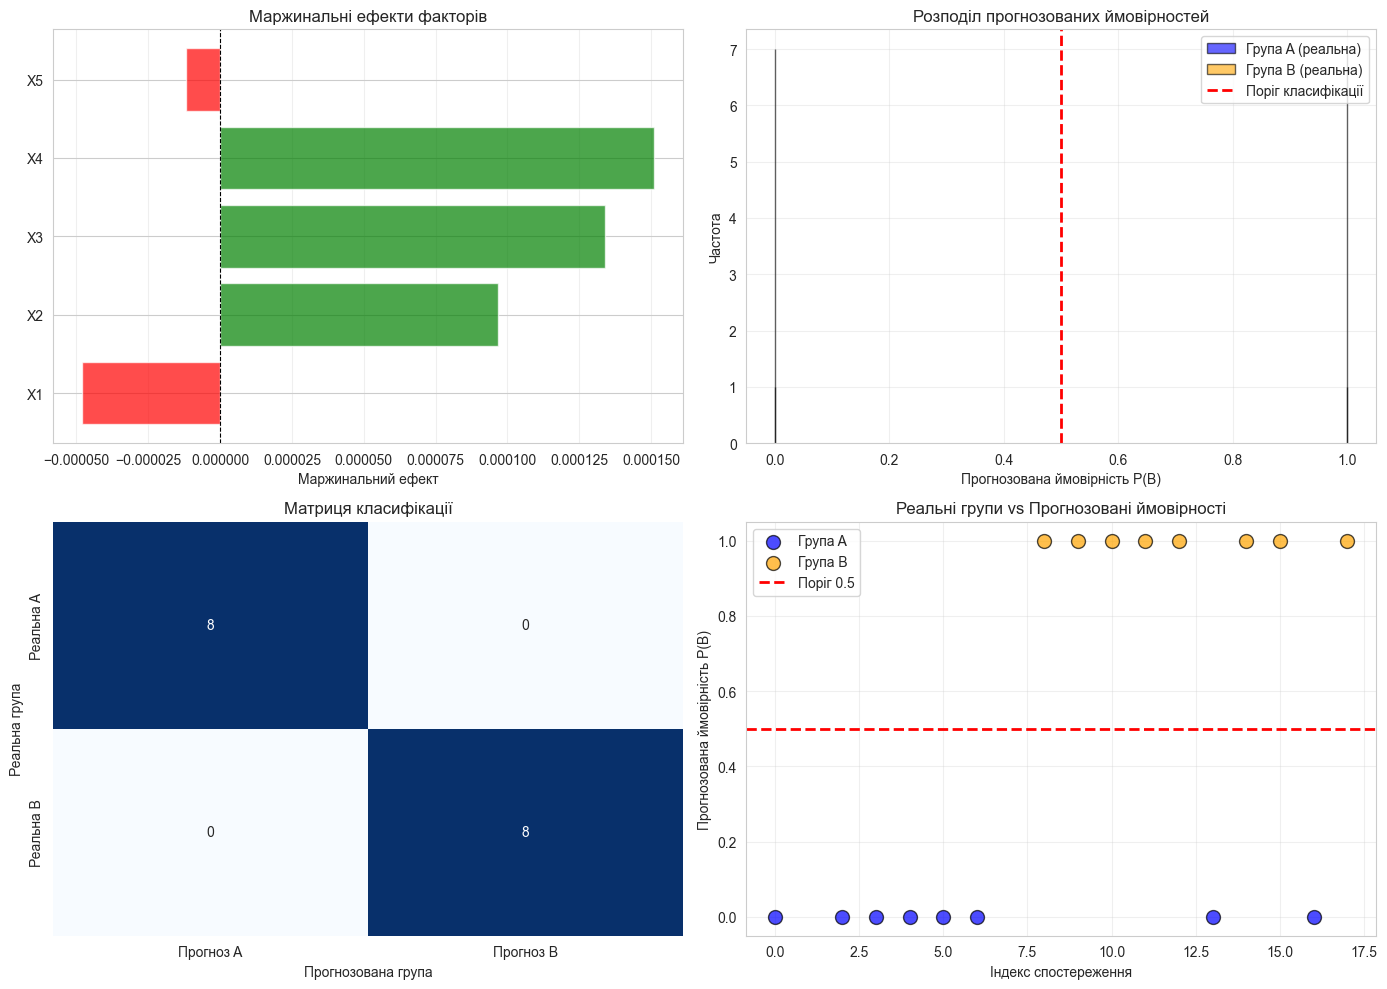

In [15]:
# Графік 1: Комплексний аналіз моделі
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1.1 Бар-чарт маржинальних ефектів
ax1 = axes[0, 0]
margeff_df = pd.DataFrame({
    'Фактор': ['X1', 'X2', 'X3', 'X4', 'X5'],
    'Ефект': margeff_values
})
colors = ['green' if x > 0 else 'red' for x in margeff_values]
ax1.barh(margeff_df['Фактор'], margeff_df['Ефект'], color=colors, alpha=0.7)
ax1.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
ax1.set_xlabel('Маржинальний ефект')
ax1.set_title('Маржинальні ефекти факторів')
ax1.grid(axis='x', alpha=0.3)

# 1.2 Розподіл прогнозованих ймовірностей
ax2 = axes[0, 1]
train_df_A = train_df[train_df['group'] == 0]
train_df_B = train_df[train_df['group'] == 1]
ax2.hist(train_df_A['predicted_prob'], bins=8, alpha=0.6, label='Група A (реальна)', color='blue', edgecolor='black')
ax2.hist(train_df_B['predicted_prob'], bins=8, alpha=0.6, label='Група B (реальна)', color='orange', edgecolor='black')
ax2.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Поріг класифікації')
ax2.set_xlabel('Прогнозована ймовірність P(B)')
ax2.set_ylabel('Частота')
ax2.set_title('Розподіл прогнозованих ймовірностей')
ax2.legend()
ax2.grid(alpha=0.3)

# 1.3 Матриця класифікації (heatmap)
ax3 = axes[1, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax3,
            xticklabels=['Прогноз A', 'Прогноз B'],
            yticklabels=['Реальна A', 'Реальна B'])
ax3.set_title('Матриця класифікації')
ax3.set_ylabel('Реальна група')
ax3.set_xlabel('Прогнозована група')

# 1.4 Scatter plot: реальні групи vs прогнозовані ймовірності
ax4 = axes[1, 1]
for group_val, group_name, color in [(0, 'Група A', 'blue'), (1, 'Група B', 'orange')]:
    subset = train_df[train_df['group'] == group_val]
    ax4.scatter(subset.index, subset['predicted_prob'], 
                label=group_name, alpha=0.7, s=100, color=color, edgecolors='black')
ax4.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Поріг 0.5')
ax4.set_xlabel('Індекс спостереження')
ax4.set_ylabel('Прогнозована ймовірність P(B)')
ax4.set_title('Реальні групи vs Прогнозовані ймовірності')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('logit_analysis_results.png', dpi=300, bbox_inches='tight')
print("\n✅ Графіки збережено у файл: logit_analysis_results.png")
plt.show()


✅ Графіки залежностей збережено у файл: logit_factor_dependencies.png


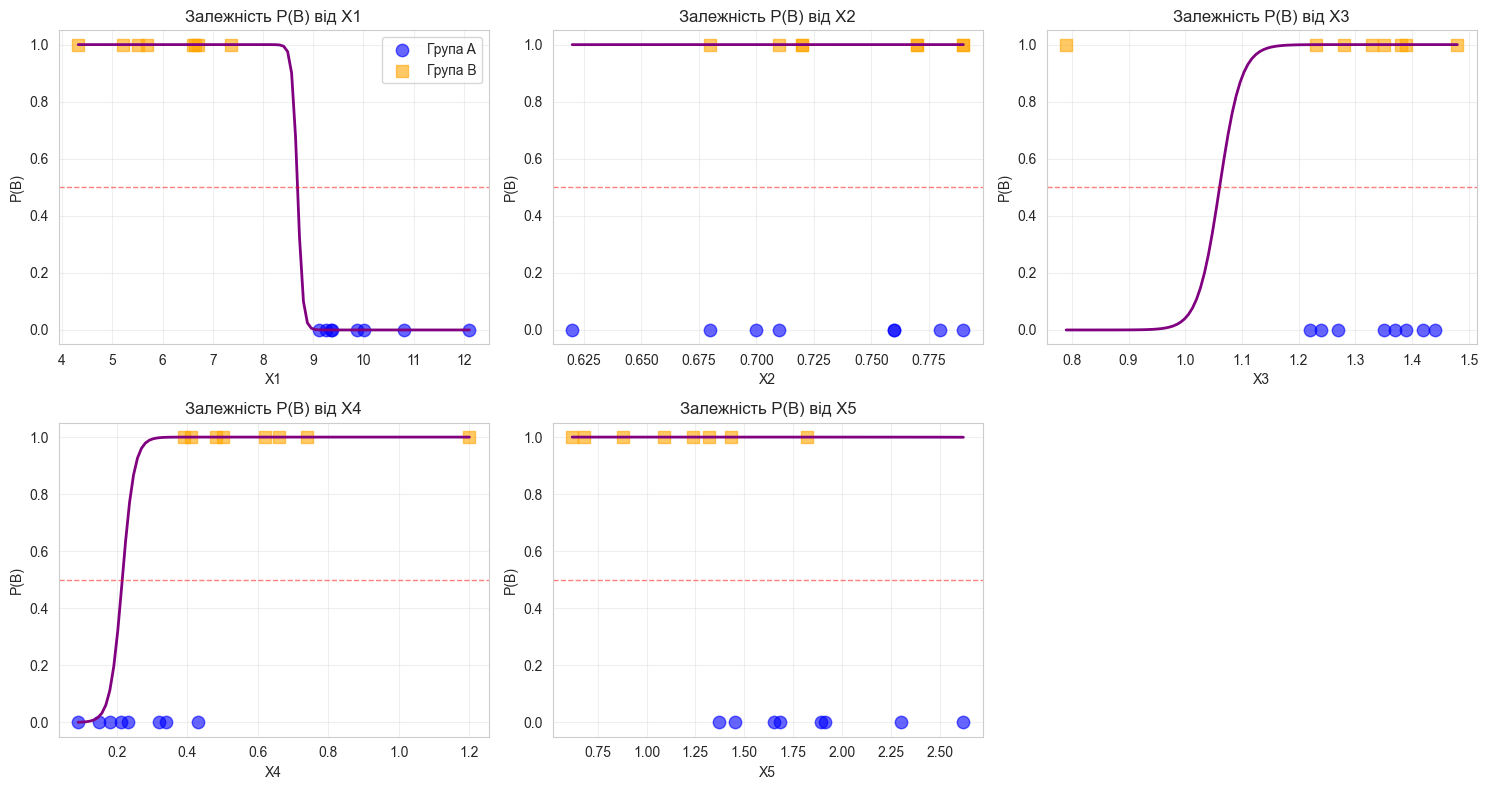

In [16]:
# Графік 2: Залежність ймовірності від окремих факторів
fig2, axes2 = plt.subplots(2, 3, figsize=(15, 8))
axes2 = axes2.flatten()

for i, var in enumerate(['X1', 'X2', 'X3', 'X4', 'X5']):
    ax = axes2[i]
    
    # Створення діапазону значень для фактора
    x_range = np.linspace(X_train[var].min(), X_train[var].max(), 100)
    
    # Фіксуємо інші фактори на середніх значеннях
    X_plot = pd.DataFrame({v: [mean_X[v]] * 100 for v in ['X1', 'X2', 'X3', 'X4', 'X5']})
    X_plot[var] = x_range
    X_plot_const = sm.add_constant(X_plot, has_constant='add')
    
    # Прогнозовані ймовірності
    y_plot = logit_result.predict(X_plot_const)
    
    # Графік
    ax.plot(x_range, y_plot, linewidth=2, color='purple')
    ax.scatter(X_train[var][train_df['group']==0], [0]*sum(train_df['group']==0), 
               alpha=0.6, s=80, color='blue', label='Група A', marker='o')
    ax.scatter(X_train[var][train_df['group']==1], [1]*sum(train_df['group']==1), 
               alpha=0.6, s=80, color='orange', label='Група B', marker='s')
    ax.axhline(y=0.5, color='red', linestyle='--', linewidth=1, alpha=0.5)
    ax.set_xlabel(var)
    ax.set_ylabel('P(B)')
    ax.set_title(f'Залежність P(B) від {var}')
    ax.grid(alpha=0.3)
    if i == 0:
        ax.legend()

# Видалити зайву підграфік
fig2.delaxes(axes2[5])

plt.tight_layout()
plt.savefig('logit_factor_dependencies.png', dpi=300, bbox_inches='tight')
print("\n✅ Графіки залежностей збережено у файл: logit_factor_dependencies.png")
plt.show()

## 8. Висновки

In [17]:
print("\n" + "="*80)
print("ВИСНОВКИ")
print("="*80)
print()
print("1. Побудовано logit-модель залежності групи підприємства від п'яти факторів:")
print("   X1 (продуктивність праці), X2 (питома вага робітників),")
print("   X3 (коефіцієнт змінності), X4 (питома вага втрат), X5 (фондовіддача).")
print()
print(f"2. Модель показала {percent_correct:.2f}% правильних класифікацій на навчальній вибірці.")
print()
print("3. Маржинальні ефекти показують вплив кожного фактора на ймовірність")
print("   належності до групи B при середніх значеннях інших факторів.")
print()
print("4. Для підприємств, що не увійшли у навчальні вибірки, виконано прогноз")
print("   ймовірності належності до групи B та класифікацію.")
print()
print("5. Графіки демонструють якість моделі, розподіл прогнозів та залежності")
print("   ймовірності від окремих факторів.")
print()
print("="*80)
print("✅ АНАЛІЗ ЗАВЕРШЕНО")
print("="*80)


ВИСНОВКИ

1. Побудовано logit-модель залежності групи підприємства від п'яти факторів:
   X1 (продуктивність праці), X2 (питома вага робітників),
   X3 (коефіцієнт змінності), X4 (питома вага втрат), X5 (фондовіддача).

2. Модель показала 100.00% правильних класифікацій на навчальній вибірці.

3. Маржинальні ефекти показують вплив кожного фактора на ймовірність
   належності до групи B при середніх значеннях інших факторів.

4. Для підприємств, що не увійшли у навчальні вибірки, виконано прогноз
   ймовірності належності до групи B та класифікацію.

5. Графіки демонструють якість моделі, розподіл прогнозів та залежності
   ймовірності від окремих факторів.

✅ АНАЛІЗ ЗАВЕРШЕНО
